In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = load_breast_cancer()
X, y = data.data, data.target
labels = data.target_names
feature_names = data.feature_names

## Print the description of the Breast Cancer data set

In [6]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

## Standardize the data

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Add some noise
Nex, add some noise to simulate random measurement error, then view the first few rows of the original and noisy features for comparison

In [9]:
np.random.seed(42) # đảm bảo mõi lần chạy lại dữ liệu tạo ra đều gioogns nhau
noise_factor = 0.5 # noise factor
X_noisy = X_scaled + noise_factor * np.random.normal(loc =0.0, scale = 1.0, size=X_scaled.shape)
#X_scaled.shap => tạo 1 mảng có cùng kích thước với X_scaled sau đó
# điều chỉnh mức độ nhiều bằng cách nhân với noise_factor
# Cộng nhiễu vào tập dữ liệu X_caled đã chuẩn hóa tạo ra X_noisy

# load the original and noisy data sets into a datafarme for comparison and visualization
df = pd.DataFrame(X_scaled, columns=feature_names)
df_noisy = pd.DataFrame(X_noisy, columns=feature_names)

In [11]:
print("Orinal data(first 5 ro):\n",df.head())

Orinal data(first 5 ro):
    mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   mean fractal dimension  ...  worst radius  worst texture  worst

In [12]:
print("Noisy data(first 5 ro):\n",df_noisy.head())

Noisy data(first 5 ro):
    mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     1.345421     -2.142467        1.593778   1.745890         1.451390   
1     1.528967      0.572507        1.679206   1.379853        -0.415690   
2     1.340301      0.363357        1.013336   0.960780         1.348473   
3    -0.720371      0.738055       -0.943714  -0.928295         3.087499   
4     2.145813     -1.606510        2.477970   1.125304         0.573800   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          3.166446        3.442480             2.916193       1.982778   
1         -1.097493        0.080586            -0.431691      -0.662701   
2          1.731046        1.327473             2.538997       1.120503   
3          2.671152        2.063957             1.582235       2.869940   
4          1.634568        0.875743             1.145344       0.040265   

   mean fractal dimension  ...  worst radius  worst texture  worst 

# Visualizing the noise content
You can get a good idea of how much noise there is in the features by comparing values in the provious tables. You can visulization the differences in several ways. Let's begin by plotting the histograms of one the features with and without noise for comparison

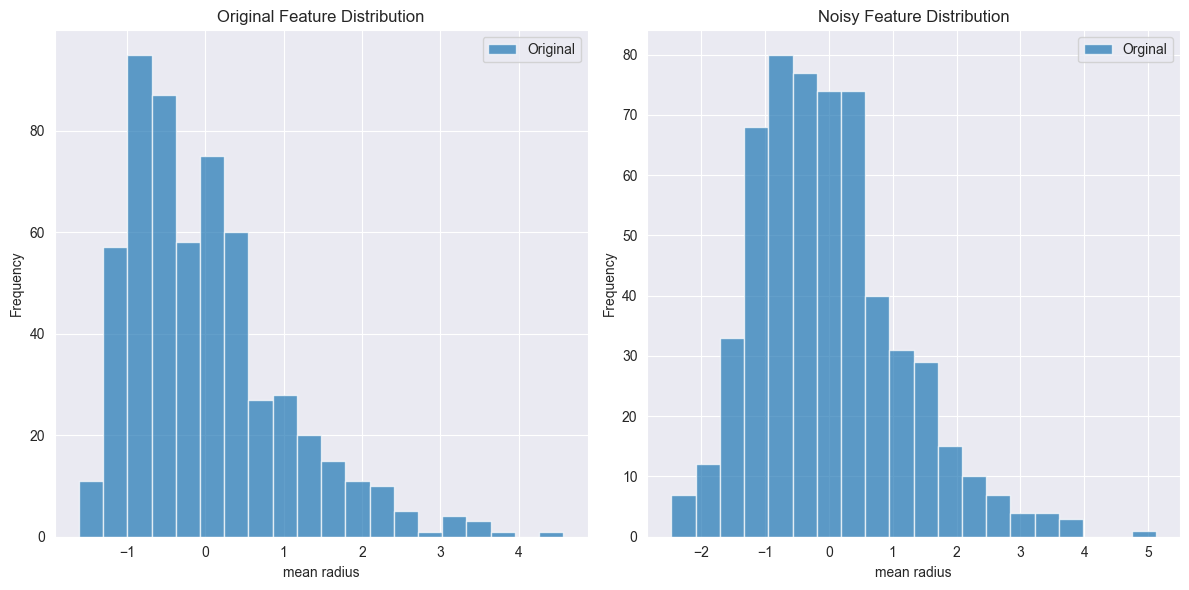

In [13]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.hist(df[feature_names[5]], bins=20, alpha=0.7, label ='Original')
plt.title('Original Feature Distribution')
plt.xlabel(feature_names[0])
plt.ylabel('Frequency')
plt.legend()

plt.ylabel('Frequency')
plt.subplot(1,2,2)
plt.hist(df_noisy[feature_names[5]], bins=20, alpha=0.7, label='Orginal')
plt.title('Noisy Feature Distribution')
plt.xlabel(feature_names[0])
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

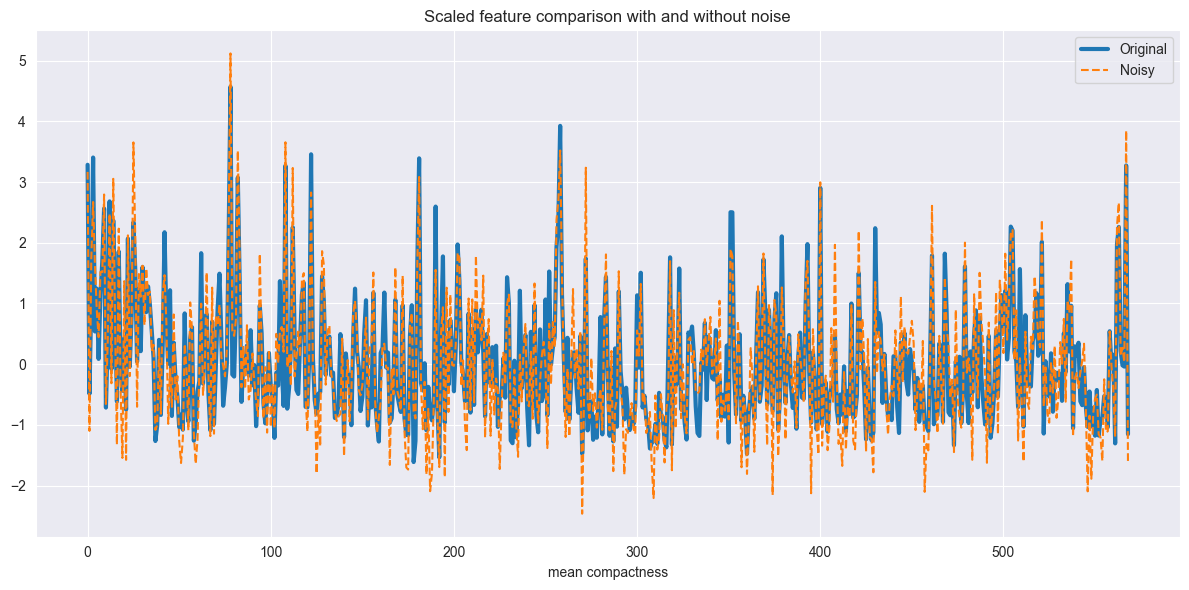

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(df[feature_names[5]], label='Original',lw=3)
plt.plot(df_noisy[feature_names[5]], '--',label='Noisy',)
plt.title('Scaled feature comparison with and without noise')
plt.xlabel(feature_names[5])
plt.legend()
plt.tight_layout()
plt.show()

## Scatterplot
Compare two feature ussing a scatterplot. Thí gives an excellent idea of how well the two features are correlated

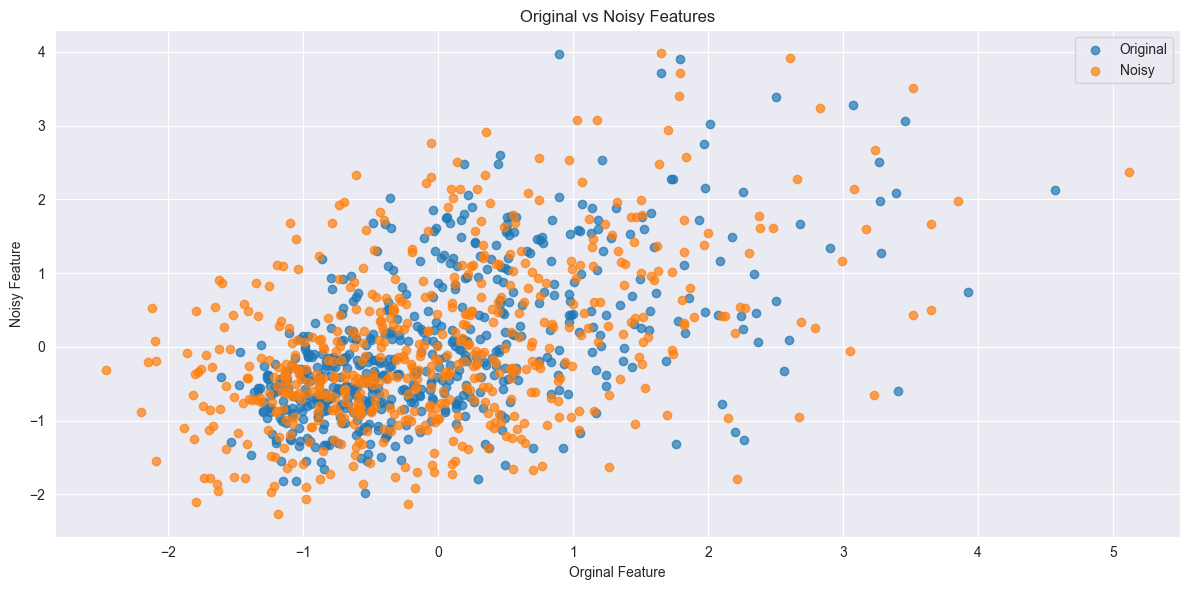

In [16]:
plt.figure(figsize=(12,6))
plt.scatter(df[feature_names[5]], df[feature_names[2]], alpha=0.7, label='Original')
plt.scatter(df_noisy[feature_names[5]], df_noisy[feature_names[2]], alpha=0.7, label='Noisy')
plt.title('Original vs Noisy Features')
plt.xlabel('Orginal Feature')
plt.ylabel('Noisy Feature')
plt.tight_layout()
plt.legend()
plt.show()

# Excise 1. Split the data and fit the KNN and SVM models to the noisy training data

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_noisy, y, test_size=0.3, random_state=42)
knn  = KNeighborsClassifier(n_neighbors=5)
svm  = SVC(kernel='linear', C=1, random_state=42)

knn.fit(X_train, y_train)
svm.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=42)

# Evaluate the models
## Predict on the test set

In [19]:
y_pred_knn = knn.predict(X_test)
y_pred_svm = svm.predict(X_test)

In [21]:
print(f"KNN accuracy: , {accuracy_score(y_test, y_pred_knn): 3f}")
print("SVM accuracy: ", accuracy_score(y_test, y_pred_svm))

KNN accuracy: ,  0.935673
SVM accuracy:  0.9707602339181286


In [22]:
print("\nKNN Testing Data Classification Report:")
print(classification_report(y_test, y_pred_knn))

print("\nSVM Testing Data Classification Report:")
print(classification_report(y_test, y_pred_svm))


KNN Testing Data Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        63
           1       0.94      0.96      0.95       108

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171


SVM Testing Data Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



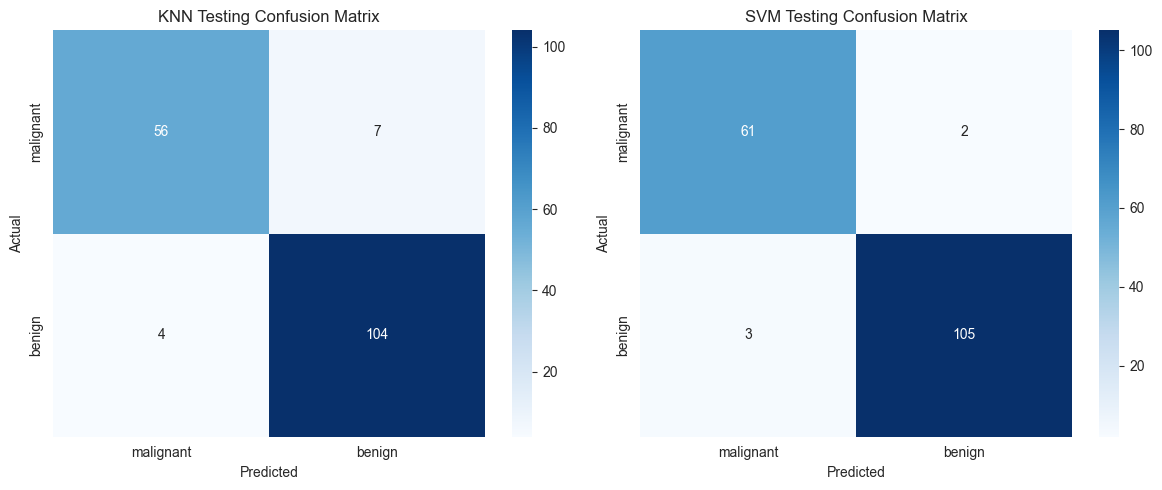

In [23]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(conf_matrix_knn, annot=True, cmap='Blues', fmt='d', ax=axes[0],
            xticklabels=labels, yticklabels=labels)

axes[0].set_title('KNN Testing Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(conf_matrix_svm, annot=True, cmap='Blues', fmt='d', ax=axes[1],
            xticklabels=labels, yticklabels=labels)
axes[1].set_title('SVM Testing Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

## Obtain the prediction results using the training data

In [25]:
y_pred_train_knn = knn.predict(X_train)
y_pred_train_svm = svm.predict(X_train)

In [26]:
print(f"KNN accuracy: , {accuracy_score(y_train, y_pred_train_knn): 3f}")
print("SVM accuracy: ", accuracy_score(y_train, y_pred_train_svm))

KNN accuracy: ,  0.954774
SVM accuracy:  0.9723618090452262


In [27]:
print("\nKNN Training Data Classification Report:")
print(classification_report(y_train, y_pred_train_knn))

print("\nSVM Training Data Classification Report:")
print(classification_report(y_train, y_pred_train_svm))


KNN Training Data Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       149
           1       0.95      0.98      0.96       249

    accuracy                           0.95       398
   macro avg       0.96      0.95      0.95       398
weighted avg       0.96      0.95      0.95       398


SVM Training Data Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       149
           1       0.97      0.99      0.98       249

    accuracy                           0.97       398
   macro avg       0.97      0.97      0.97       398
weighted avg       0.97      0.97      0.97       398



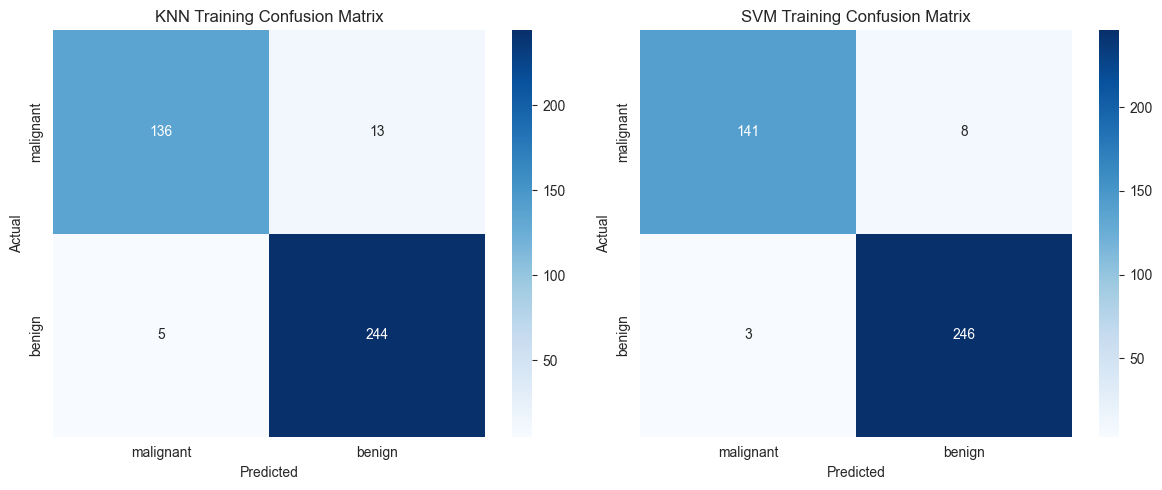

In [28]:
# Enter your code here
conf_matrix_knn = confusion_matrix(y_train, y_pred_train_knn)
conf_matrix_svm = confusion_matrix(y_train, y_pred_train_svm)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(conf_matrix_knn, annot=True, cmap='Blues', fmt='d', ax=axes[0],
            xticklabels=labels, yticklabels=labels)

axes[0].set_title('KNN Training Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(conf_matrix_svm, annot=True, cmap='Blues', fmt='d', ax=axes[1],
            xticklabels=labels, yticklabels=labels)
axes[1].set_title('SVM Training Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

Ideally the accuracy of a model would be almost the same on the training and testing data sets.

It would be unusual for the accuracy to be higher on the test set and this might occur due to chance or some sort of data leakage. For example, here we have normalized all of the data rather than fitting StandardScaler to the training data and only then applying it to the train and test sets separately. We'll revisit this and other pitfalls in another lab.

When the accuracy is substantially higher on the training data than on the testing data, the model is likely memorizing details in the training data that don't generalize to the unseen data - the model is overfitting to the training data.
